In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.preprocessing import minmax_scale,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
#"C:\Users\Admin\OneDrive - O365Sonata\Documents\R10x"
directory_DRG =r"C:\Users\Admin\OneDrive - O365Sonata\Documents\R10x\DRG"
directory_weather=r"C:\Users\Admin\OneDrive - O365Sonata\Documents\R10x\Weather"
directory_events=r"C:\Users\Admin\OneDrive - O365Sonata\Documents\R10x\Events"

In [3]:
#Merging alll product files into single file
data_Products=pd.DataFrame(columns=['store_id','upc_code','item_name','date','amount','quantity','unit_price','category','size','msu'])
for i in os.listdir(directory_DRG):
    df=pd.read_csv('C:\\Users\\Admin\\OneDrive - O365Sonata\\Documents\\R10x\\DRG\\'+str(i))
    #df=df.drop(columns=['size'],axis=1,inplace =True)
    #df.to_csv('C:\\Users\\syed.s\\Documents\\RX100\\DRG\\DRG_updated\\'+str(i))
    data_Products = pd.concat([data_Products,df],ignore_index=True)
    #ddf.append(df)

In [4]:
len(data_Products['upc_code'].value_counts())

34

In [5]:
#Merging alll weather files into single file
#weather=pd.DataFrame(columns=['PDT','mintempm','maxtempm','meantempm','mintempi','maxtempi','meantempi','fog','rain','snow','hail','thunder','tornado'])
data_weather=pd.DataFrame()
for i in os.listdir(directory_weather):
    print(i)
    df=pd.read_csv('C:\\Users\\Admin\\OneDrive - O365Sonata\\Documents\\R10x\\Weather\\'+str(i),sep=",",header=None)
    #df=df.drop(columns=['size'],axis=1,inplace =True)
    #df.to_csv('C:\\Users\\syed.s\\Documents\\RX100\\DRG\\DRG_updated\\'+str(i))
    data_weather = pd.concat([data_weather,df],ignore_index=True)
    data_weather=data_weather[1:]
    #ddf.append(df)

weather_90.txt


In [6]:
data_weather.columns=['PDT','mintempm','maxtempm','meantempm','mintempi','maxtempi','meantempi','fog','rain','snow','hail','thunder','tornado']

In [7]:
data_events=pd.DataFrame(columns=['Date','Day','Event','WeekEnd','Holiday','LongVacation','HighSales'])
for i in os.listdir(directory_events):
    df=pd.read_csv('C:\\Users\\Admin\\OneDrive - O365Sonata\\Documents\\R10x\\Events\\'+str(i))
    #df=df.drop(columns=['size'],axis=1,inplace =True)
    #df.to_csv('C:\\Users\\syed.s\\Documents\\RX100\\DRG\\DRG_updated\\'+str(i))
    data_events = pd.concat([data_events,df],ignore_index=True)
    #ddf.append(df)

In [8]:
data_events.head()

,Date,Day,Event,WeekEnd,Holiday,LongVacation,HighSales
0,1/1/2018,Monday,New Year,1,1,1,0
1,2/1/2018,Tuesday,Prior Dia de los Re1 Magos/Three Kings Day,0,0,0,1
2,3/1/2018,Wednesday,Prior Dia de los Re1 Magos/Three Kings Day,0,0,0,1
3,4/1/2018,Thursday,Prior Dia de los Re1 Magos/Three Kings Day,0,0,0,1
4,5/1/2018,Friday,Prior Dia de los Re1 Magos/Three Kings Day,0,0,0,1


In [9]:
data_Products['store_id']=90
data_weather['store_id']=90

In [10]:
data_weather['store_id']=data_weather['store_id'].astype(int)
data_Products['store_id']=data_Products['store_id'].astype(int)

In [11]:
data_weather.head()

,PDT,mintempm,maxtempm,meantempm,mintempi,maxtempi,meantempi,fog,rain,snow,hail,thunder,tornado,store_id
1,2014-01-01,0,15,8,32,59,46,0,0,0,0,0,0,90
2,2014-01-02,2,17,9,35,62,48,0,0,0,0,0,0,90
3,2014-01-03,3,16,9,37,60,48,0,0,0,0,0,0,90
4,2014-01-04,3,20,11,37,68,52,1,0,0,0,0,0,90
5,2014-01-05,1,19,10,33,66,50,0,0,0,0,0,0,90


In [12]:
data_Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45734 entries, 0 to 45733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   store_id    45734 non-null  int32  
 1   upc_code    45734 non-null  object 
 2   item_name   45734 non-null  object 
 3   date        45734 non-null  object 
 4   amount      45734 non-null  float64
 5   quantity    45734 non-null  object 
 6   unit_price  45734 non-null  float64
 7   category    0 non-null      float64
 8   size        35537 non-null  object 
 9   msu         45734 non-null  object 
dtypes: float64(3), int32(1), object(6)
memory usage: 3.3+ MB


In [13]:
data_Products.upc_code.unique()

array([710114, 711814, 712118, 712415, 712811, 712910, 712927, 713115,
       252174000007, 252175000006, 252176000005, 252179000002,
       257251000000, 257252000009, 257253000008, 257254000007,
       257255000006, 257256000005, 257257000004, 257265000003,
       257266000002, 257267000001, 257268000000, 257272000003,
       271011000000, 271078000005, 271124000003, 271181000008,
       271211000008, 271241000009, 271281000007, 271291000004,
       271292000003, 271311000007], dtype=object)

In [14]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1931 entries, 1 to 1931
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PDT        1931 non-null   object
 1   mintempm   1931 non-null   object
 2   maxtempm   1931 non-null   object
 3   meantempm  1931 non-null   object
 4   mintempi   1931 non-null   object
 5   maxtempi   1931 non-null   object
 6   meantempi  1931 non-null   object
 7   fog        1931 non-null   object
 8   rain       1931 non-null   object
 9   snow       1931 non-null   object
 10  hail       1931 non-null   object
 11  thunder    1931 non-null   object
 12  tornado    1931 non-null   object
 13  store_id   1931 non-null   int32 
dtypes: int32(1), object(13)
memory usage: 203.8+ KB


In [15]:
data_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          281 non-null    object
 1   Day           281 non-null    object
 2   Event         281 non-null    object
 3   WeekEnd       281 non-null    object
 4   Holiday       281 non-null    object
 5   LongVacation  281 non-null    object
 6   HighSales     281 non-null    object
dtypes: object(7)
memory usage: 15.5+ KB


In [16]:
dictTempLabels = {'V_COLD':[-10,40],
                'COLD':[40,60],
                'MODERATE':[60,80],
               'HOT':[80,100],
             'V_HOT':[100,150]}

In [17]:
def SetTempBucket(refVal):    
    for k,(low_val,high_val) in dictTempLabels.items():
        if (refVal >= low_val and refVal < high_val): 
            TempLabel = k
            break;
            
    return TempLabel

In [18]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1931 entries, 1 to 1931
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PDT        1931 non-null   object
 1   mintempm   1931 non-null   object
 2   maxtempm   1931 non-null   object
 3   meantempm  1931 non-null   object
 4   mintempi   1931 non-null   object
 5   maxtempi   1931 non-null   object
 6   meantempi  1931 non-null   object
 7   fog        1931 non-null   object
 8   rain       1931 non-null   object
 9   snow       1931 non-null   object
 10  hail       1931 non-null   object
 11  thunder    1931 non-null   object
 12  tornado    1931 non-null   object
 13  store_id   1931 non-null   int32 
dtypes: int32(1), object(13)
memory usage: 203.8+ KB


In [19]:
#Joined product data and weather data with date and store
data_weather['PDT']=pd.to_datetime(data_weather['PDT'])
data_Products['date']= pd.to_datetime(data_Products['date'])
final_data=pd.merge(data_Products,data_weather,how='left',left_on=['date','store_id'],right_on=['PDT','store_id'])
#Fill the null values of meantempi with median
final_data['meantempi']=final_data['meantempi'].fillna(final_data['meantempi'].median())
final_data['meantempi']=final_data['meantempi'].astype('int64') 

In [20]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45734 entries, 0 to 45733
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   store_id    45734 non-null  int32         
 1   upc_code    45734 non-null  object        
 2   item_name   45734 non-null  object        
 3   date        45734 non-null  datetime64[ns]
 4   amount      45734 non-null  float64       
 5   quantity    45734 non-null  object        
 6   unit_price  45734 non-null  float64       
 7   category    0 non-null      float64       
 8   size        35537 non-null  object        
 9   msu         45734 non-null  object        
 10  PDT         43693 non-null  datetime64[ns]
 11  mintempm    43693 non-null  object        
 12  maxtempm    43693 non-null  object        
 13  meantempm   43693 non-null  object        
 14  mintempi    43693 non-null  object        
 15  maxtempi    43693 non-null  object        
 16  meantempi   45734 non-

In [21]:
#created new column temptype based on meantempi
final_data["Temp_Types"] = final_data['meantempi'].apply(SetTempBucket)

In [22]:
final_data.head()

,store_id,upc_code,item_name,date,amount,quantity,unit_price,category,size,msu,...,mintempi,maxtempi,meantempi,fog,rain,snow,hail,thunder,tornado,Temp_Types
0,90,710114,SWEET BAGUETTE,2014-01-02,39.95,17,2.35,NaN,Each,1,...,35,62,48,0,0,0,0,0,0,COLD
1,90,710114,SWEET BAGUETTE,2014-01-03,70.50,30,2.35,NaN,Each,1,...,37,60,48,0,0,0,0,0,0,COLD
2,90,710114,SWEET BAGUETTE,2014-01-04,72.85,31,2.35,NaN,Each,1,...,37,68,52,1,0,0,0,0,0,COLD
3,90,710114,SWEET BAGUETTE,2014-01-05,89.30,38,2.35,NaN,Each,1,...,33,66,50,0,0,0,0,0,0,COLD
4,90,710114,SWEET BAGUETTE,2014-01-06,68.15,29,2.35,NaN,Each,1,...,37,57,46,0,0,0,0,0,0,COLD


In [23]:
#Numerical Data Exploration

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


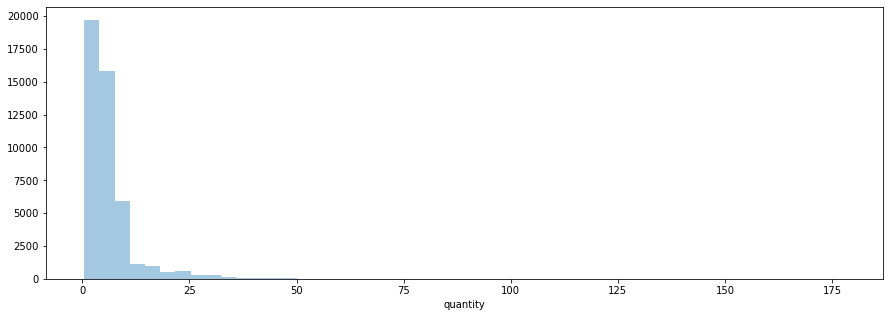

In [24]:
plt.figure(figsize=(15,5))
sns.distplot(final_data['quantity'],kde=False)
plt.show()

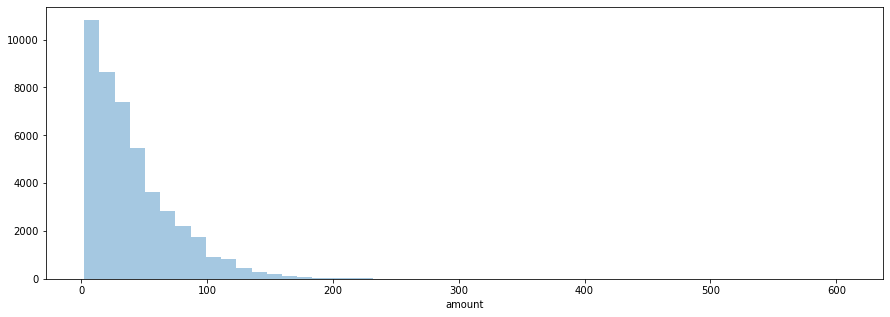

In [25]:
plt.figure(figsize=(15,5))
sns.distplot(final_data['amount'],kde=False)
plt.show()

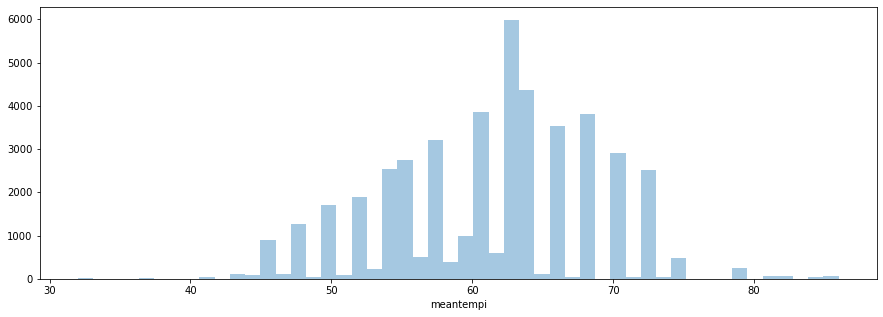

In [26]:
plt.figure(figsize=(15,5))
sns.distplot(final_data['meantempi'],kde=False)
plt.show()

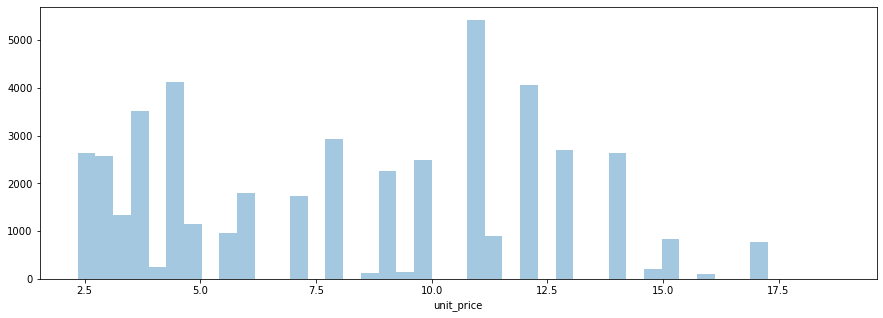

In [27]:
plt.figure(figsize=(15,5))
sns.distplot(final_data['unit_price'],kde=False)
plt.show()

In [28]:
#Categorical Data E#xploration

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


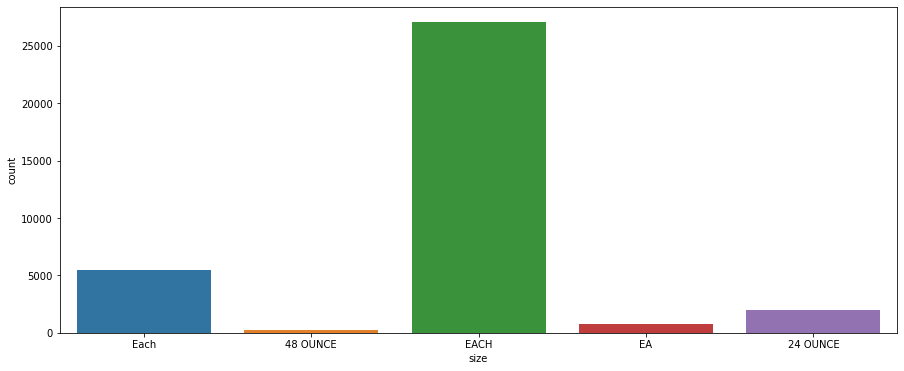

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(final_data['size'])
plt.show()

In [30]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45734 entries, 0 to 45733
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   store_id    45734 non-null  int32         
 1   upc_code    45734 non-null  object        
 2   item_name   45734 non-null  object        
 3   date        45734 non-null  datetime64[ns]
 4   amount      45734 non-null  float64       
 5   quantity    45734 non-null  object        
 6   unit_price  45734 non-null  float64       
 7   category    0 non-null      float64       
 8   size        35537 non-null  object        
 9   msu         45734 non-null  object        
 10  PDT         43693 non-null  datetime64[ns]
 11  mintempm    43693 non-null  object        
 12  maxtempm    43693 non-null  object        
 13  meantempm   43693 non-null  object        
 14  mintempi    43693 non-null  object        
 15  maxtempi    43693 non-null  object        
 16  meantempi   45734 non-

In [31]:
final_data['quantity']=final_data['quantity'].astype(int)

In [32]:
corr=final_data[['quantity','meantempi']].corr()

<AxesSubplot:>

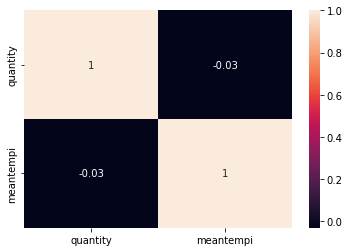

In [33]:
sns.heatmap(corr,annot=True)

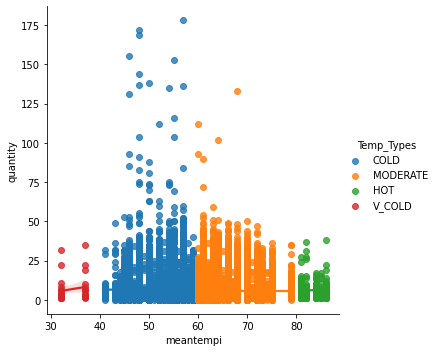

In [34]:
sns.lmplot(x='meantempi',y='quantity',hue='Temp_Types',data=final_data)

<AxesSubplot:xlabel='meantempi', ylabel='quantity'>

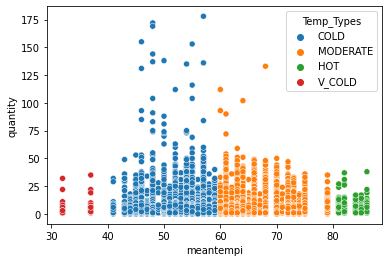

In [35]:
sns.scatterplot(x='meantempi',y='quantity',hue='Temp_Types',data=final_data)

In [36]:
#Extra feature 
#extra data

In [37]:
final_data.head()

,store_id,upc_code,item_name,date,amount,quantity,unit_price,category,size,msu,...,mintempi,maxtempi,meantempi,fog,rain,snow,hail,thunder,tornado,Temp_Types
0,90,710114,SWEET BAGUETTE,2014-01-02,39.95,17,2.35,NaN,Each,1,...,35,62,48,0,0,0,0,0,0,COLD
1,90,710114,SWEET BAGUETTE,2014-01-03,70.50,30,2.35,NaN,Each,1,...,37,60,48,0,0,0,0,0,0,COLD
2,90,710114,SWEET BAGUETTE,2014-01-04,72.85,31,2.35,NaN,Each,1,...,37,68,52,1,0,0,0,0,0,COLD
3,90,710114,SWEET BAGUETTE,2014-01-05,89.30,38,2.35,NaN,Each,1,...,33,66,50,0,0,0,0,0,0,COLD
4,90,710114,SWEET BAGUETTE,2014-01-06,68.15,29,2.35,NaN,Each,1,...,37,57,46,0,0,0,0,0,0,COLD


In [38]:
#identifying the UPC unique values
final_data['upc_code'].unique()

array([710114, 711814, 712118, 712415, 712811, 712910, 712927, 713115,
       252174000007, 252175000006, 252176000005, 252179000002,
       257251000000, 257252000009, 257253000008, 257254000007,
       257255000006, 257256000005, 257257000004, 257265000003,
       257266000002, 257267000001, 257268000000, 257272000003,
       271011000000, 271078000005, 271124000003, 271181000008,
       271211000008, 271241000009, 271281000007, 271291000004,
       271292000003, 271311000007], dtype=object)

In [39]:
final_data.shape

(45734, 24)

In [40]:
final_data.columns

Index(['store_id', 'upc_code', 'item_name', 'date', 'amount', 'quantity',
       'unit_price', 'category', 'size', 'msu', 'PDT', 'mintempm', 'maxtempm',
       'meantempm', 'mintempi', 'maxtempi', 'meantempi', 'fog', 'rain', 'snow',
       'hail', 'thunder', 'tornado', 'Temp_Types'],
      dtype='object')

In [41]:
#creating the new columns date month and year
final_data['date']=pd.to_datetime(final_data['date'])
final_data['year']=final_data['date'].dt.year
final_data["month"]=final_data['date'].dt.month

In [42]:
#maximum value
max(final_data['date'])

Timestamp('2019-06-27 00:00:00')

In [43]:
#Checking for missing values.
percent_missing = final_data.isnull().sum() * 100 / len(final_data)
missing_value_combined_df = pd.DataFrame({'column_name': final_data.columns,
                                 'percent_missing': percent_missing})
missing_value_combined_df

,column_name,percent_missing
store_id,store_id,0.000000
upc_code,upc_code,0.000000
item_name,item_name,0.000000
date,date,0.000000
amount,amount,0.000000
quantity,quantity,0.000000
unit_price,unit_price,0.000000
category,category,100.000000
size,size,22.296322
msu,msu,0.000000


In [44]:
#new_df_aus_core_act.groupby(new_df_aus_core_act['date'].dt.to_period('W-SUN'))['quantity'].sum()#agg('count')
#final_data_2['date']=pd.to_datetime(final_data_2['date'])
final_df_core= (final_data
     .reset_index()
     .set_index("date")
     .groupby(['store_id', 'upc_code','year','month',pd.Grouper(freq='M')])["quantity"].sum()
     .astype(int)
     .reset_index())

In [45]:
maximumdate=max(final_df_core['date'])
minimumdate=min(final_df_core['date'])

In [46]:
#creating dataframe of dates with unique combination 
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta


start_date, end_date = minimumdate, maximumdate+relativedelta(months=+1)

date_range = pd.date_range(start_date, end_date - timedelta(), freq='M')

In [47]:
#creating the date as column
df_date=pd.DataFrame(date_range,columns=['date'])

In [48]:
#assigined it into unique combinations
df_unique_combinations=pd.DataFrame(list(final_df_core['upc_code'].unique()),columns=['upc_code'])

In [49]:
#merging into assigining dataframe
df_data_model=df_unique_combinations.assign(foo=1).merge(df_date.assign(foo=1)).drop('foo', 1)

C:\Users\Admin\AppData\Local\Temp/ipykernel_4688/1524140305.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_data_model=df_unique_combinations.assign(foo=1).merge(df_date.assign(foo=1)).drop('foo', 1)


In [50]:
df_data_model

,upc_code,date
0,710114,2014-01-31
1,710114,2014-02-28
2,710114,2014-03-31
3,710114,2014-04-30
4,710114,2014-05-31
...,...,...
2239,271311000007,2019-02-28
2240,271311000007,2019-03-31
2241,271311000007,2019-04-30
2242,271311000007,2019-05-31


In [51]:
#created the final dataframe with existing one
final_core=pd.merge(df_data_model,final_df_core,on=['upc_code','date'],how='left')

In [52]:
#final_core.drop(columns='store_id_upc_code',inplace=True)

In [53]:
final_core

,upc_code,date,store_id,year,month,quantity
0,710114,2014-01-31,90.0,2014.0,1.0,857.0
1,710114,2014-02-28,90.0,2014.0,2.0,747.0
2,710114,2014-03-31,90.0,2014.0,3.0,751.0
3,710114,2014-04-30,90.0,2014.0,4.0,803.0
4,710114,2014-05-31,90.0,2014.0,5.0,854.0
...,...,...,...,...,...,...
2239,271311000007,2019-02-28,NaN,NaN,NaN,NaN
2240,271311000007,2019-03-31,90.0,2019.0,3.0,1.0
2241,271311000007,2019-04-30,90.0,2019.0,4.0,2.0
2242,271311000007,2019-05-31,90.0,2019.0,5.0,7.0


In [54]:
final_core.fillna(value=0,inplace=True)

In [55]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from time import time
import itertools

In [56]:
final_core.columns

Index(['upc_code', 'date', 'store_id', 'year', 'month', 'quantity'], dtype='object')

In [57]:
final_core['date']=final_core['date'].astype("datetime64[M]")
final_core['date']=pd.to_datetime(final_core['date'])

In [58]:
maximumdate=final_core['date'].max()

In [59]:
maximumdate

Timestamp('2019-06-01 00:00:00')

In [141]:
def sarima(dfi,st,end,months):
    '''Using Sarimax as model for demand forecasting where data having identification as normal and quaterly are considered 
       This function on execution will return a dataframe containing the forecast fo sales for relative customer item 
       combinations with Mape result'''
    import time
    start = time.process_time()
    predicted = pd.DataFrame()
    #print(start,end)
    for i in list(dfi["upc_code"].unique()[st:end]):
        #print(i)
        data = dfi[dfi["upc_code"]==i].groupby('date')['quantity'].sum().reset_index()
        data = data.set_index("date")
        y = data["quantity"].resample("MS").sum()
        p = d = q = range(0, 2)
        pdq = list(itertools.product(p, d, q))
        seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
        df_test_model=pd.DataFrame(columns=['P_D_Q','Seasonal_p-d-q','aic_score'])
        #print(df_test_model)
        for param in pdq:
            for param_seasonal in seasonal_pdq:
                try:
                    mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                    results = mod.fit(disp=False)
                    #print(results)
                    df_test_model=df_test_model.append({'P_D_Q':param,'Seasonal_p-d-q':param_seasonal,'aic_score':results.aic},ignore_index=True)
                    #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                except:
                    continue
                #print(results)
        #print(order)
        order = df_test_model[df_test_model['aic_score']==df_test_model['aic_score'].min()]["P_D_Q"].values[0]

        #print(order)
        seasonal_order = df_test_model[df_test_model['aic_score']==df_test_model['aic_score'].min()]["Seasonal_p-d-q"].values[0]
        mod = sm.tsa.statespace.SARIMAX(y,
                                        order=order,
                                        seasonal_order=seasonal_order,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit(disp=False)
        pred = results.get_prediction(start=maximumdate-pd.DateOffset(months=months-1), dynamic=False)
        pred1 = results.get_prediction(start=maximumdate+ pd.DateOffset(months=1),end=maximumdate+ pd.DateOffset(months=months),dynamic=False)
        y_forecasted1 = pred1.predicted_mean
        y_forecasted = pred.predicted_mean
        #print(y_forecasted)
        y_truth = y[str(maximumdate-pd.DateOffset(months=months-1)):]
        #y_forecasted=y_forecasted.clip(min=0)
        #y_forecasted1= y_forecasted1.clip(min=0)
        mse = ((y_forecasted - y_truth) ** 2).mean()
        #y_forecasted.values=[0 if i < 0 else i for i in y_forecasted.values]
        mape = mean_absolute_percentage_error(y_truth, y_forecasted)
        y_forecasted_df=y_forecasted.to_frame().reset_index()
        y_forecasted_df['actual']=y_truth.values
        y_forecasted_df['mape']=round(mape)
        y_forecasted_df['upc_code']=i
        y_forecasted_df.columns=['date','forecast','actual','mape','upc_code']
        #print(y_forecasted_df)
        y_forecasted1_df=y_forecasted1.to_frame().reset_index()
        y_forecasted1_df['actual']='NA'
        y_forecasted1_df['mape']=round(mape)
        y_forecasted1_df['upc_code']=i
        y_forecasted1_df.columns=['date','forecast','actual','mape','upc_code']
        final=pd.concat([y_forecasted_df,y_forecasted1_df])
        final['forecast']=[round(negative(i)) for i in final['forecast']]
        #print(final)
        final=final[['date','upc_code','actual','forecast','mape']]
        #print(final.shape)
        if len(y_truth) != 0:
            #for j in range(len(y_truth)):
                #predicted = predicted.append({"date": y_forecasted.index.values[j], "region_store_itemid_size_style_code_colour": i, "actual": y_truth.values[j],"forecast": round(negative(y_forecasted.values[j])),"mape":round(mape),"future_months":y_forecasted1.index.values[j],"future_forecast":round(negative(y_forecasted1.values[j]))}, ignore_index=True)
            predicted=predicted.append(final)
        else:
            predicted = predicted.append({"date": y_forecasted.index.values[0], "upc_code": i, "actual": 0,"forecast": round(y_forecasted.values[0]),"mape":-1}, ignore_index=True)    
    print("Time taken",time.process_time() - start)       
    #print(predicted)
    return predicted        
    


In [60]:
import itertools
def mean_absolute_percentage_error(y_truth, y_forecasted):
    print(np.mean(np.abs(percentage_error(np.asarray(np.round(y_truth)), np.asarray(np.round(y_forecasted))))) * 100)
    return np.mean(np.abs(percentage_error(np.asarray(np.round(y_truth)), np.asarray(np.round(y_forecasted))))) * 100

def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    print(actual,predicted)
    for j in range(actual.shape[0]):
        if actual[j] == 0 and negative(predicted[j])==0:
            res[j]=0
        elif actual[j] == 0 and negative(predicted[j])>0:
            res[j]=1
        else:
            res[j] = (actual[j] - predicted[j]) / actual[j]
    #print(res)  
    return res
def negative(number):
    if number <0:
        return 0
    else:
        return number

In [143]:
test=sarima(final_core,0,100,4)

[565. 487. 526. 251.] [523. 481. 527. 464.]
23.429083252539723
[565. 487. 526. 251.] [523. 481. 527. 464.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[165. 141. 122. 102.] [165. 150. 154. 114.]
11.094298200619626
[165. 141. 122. 102.] [165. 150. 154. 114.]
[51. 37. 46. 33.] [62. 46. 40. 41.]
20.79471356964963
[51. 37. 46. 33.] [62. 46. 40. 41.]
[358. 321. 334. 297.] [362. 285. 319. 283.]
5.384273596164699
[358. 321. 334. 297.] [362. 285. 319. 283.]
[44. 53. 50. 43.] [65. 31. 43. 38.]
28.71615341657027
[44. 53. 50. 43.] [65. 31. 43. 38.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[116. 110. 123. 100.] [146. 108. 100. 102.]
12.094859443892245
[116. 110. 123. 100.] [146. 108. 100. 102.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[42.  6.  4.  2.] [18. 25. 10.  1.]
143.45238095238096
[42.  6.  4.  2.] [18. 25. 10.  1.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[112. 128. 112. 103.] [121.  98.  98. 105.]
11.478740464632455
[112. 128. 112. 103.] [121.  98.  98. 105.]
[40. 45. 32. 42.] [42. 40. 54. 34.]
25.97718253968254
[40. 45. 32. 42.] [42. 40. 54. 34.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[123. 115. 142. 123.] [123. 126. 184. 125.]
10.192174610049836
[123. 115. 142. 123.] [123. 126. 184. 125.]
[142. 130.  96. 130.] [126. 141. 140. 121.]
18.12138858793788
[142. 130.  96. 130.] [126. 141. 140. 121.]
[142. 113. 136. 111.] [141. 127. 127. 128.]
8.756642064306243
[142. 113. 136. 111.] [141. 127. 127. 128.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

[196. 163. 186. 185.] [158. 177. 169. 183.]
9.549394546143294
[196. 163. 186. 185.] [158. 177. 169. 183.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[169. 149. 193. 177.] [150. 154. 177. 190.]
7.558274114264631
[169. 149. 193. 177.] [150. 154. 177. 190.]
[159. 130. 120. 120.] [133. 130. 164. 142.]
17.83805031446541
[159. 130. 120. 120.] [133. 130. 164. 142.]
[ 90.  82.  99. 105.] [ 74.  73.  85. 102.]
11.437986133108085
[ 90.  82.  99. 105.] [ 74.  73.  85. 102.]
[ 72.  64.  91. 111.] [78. 62. 68. 95.]
12.786868255618256
[ 72.  64.  91. 111.] [78. 62. 68. 95.]
[54. 36. 36. 50.] [46. 46. 50. 39.]
25.87037037037037
[54. 36. 36. 50.] [46. 46. 50. 39.]
[149. 154. 150. 117.] [116. 125. 149. 124.]
11.907098121863223
[149. 154. 150. 117.] [116. 125. 149. 124.]
[56. 67. 88. 86.] [68. 66. 81. 83.]
8.591006572393244
[56. 67. 88. 86.] [68. 66. 81. 83.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[74. 41. 69. 86.] [63. 52. 63. 62.]
19.57419051891172
[74. 41. 69. 86.] [63. 52. 63. 62.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[162. 111. 150. 141.] [156. 141. 121. 144.]
13.047930909633038
[162. 111. 150. 141.] [156. 141. 121. 144.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[63. 59. 68. 72.] [57. 62. 71. 63.]
7.880079998100936
[63. 59. 68. 72.] [57. 62. 71. 63.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[122. 117. 148. 140.] [137. 135. 138. 154.]
11.109113527146313
[122. 117. 148. 140.] [137. 135. 138. 154.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 18.  21.  21. 224.] [ 9. 22. 37. 42.]
53.050595238095234
[ 18.  21.  21. 224.] [ 9. 22. 37. 42.]
[16. 34. 28. 15.] [24. 17. 29. 26.]
44.226190476190474
[16. 34. 28. 15.] [24. 17. 29. 26.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

[0. 0. 0. 0.] [-0. -0.  0.  0.]
0.0
[0. 0. 0. 0.] [-0. -0.  0.  0.]
[0. 1. 0. 0.] [-2. -1. -0. -2.]
50.0
[0. 1. 0. 0.] [-2. -1. -0. -2.]
[0. 1. 0. 0.] [3. 1. 1. 1.]
75.0
[0. 1. 0. 0.] [3. 1. 1. 1.]
[11. 29. 26. 27.] [35. 31. 28. 36.]
66.52600273289929
[11. 29. 26. 27.] [35. 31. 28. 36.]
[4. 0. 0. 4.] [ 1. -2. -1. -1.]
50.0
[4. 0. 0. 4.] [ 1. -2. -1. -1.]
[77.  5.  1.  0.] [44.  1.  1.  3.]
55.714285714285715
[77.  5.  1.  0.] [44.  1.  1.  3.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[117. 165. 182. 168.] [173. 142. 160. 157.]
20.10954323454324
[117. 165. 182. 168.] [173. 142. 160. 157.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 1.  2.  7. 17.] [-0.  0.  1.  3.]
92.01680672268908
[ 1.  2.  7. 17.] [-0.  0.  1.  3.]
Time taken 505.09375


In [146]:
test.head(9)

,date,upc_code,actual,forecast,mape
0,2019-03-01,710114,565.0,523,23
1,2019-04-01,710114,487.0,481,23
2,2019-05-01,710114,526.0,527,23
3,2019-06-01,710114,251.0,464,23
0,2019-07-01,710114,NA,305,23
1,2019-08-01,710114,NA,389,23
2,2019-09-01,710114,NA,357,23
3,2019-10-01,710114,NA,379,23
0,2019-03-01,711814,165.0,165,11


In [147]:
test=sarima(final_core,0,100,4)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


[565. 487. 526. 251.] [523. 481. 527. 464.]
23.429083252539723
[565. 487. 526. 251.] [523. 481. 527. 464.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[165. 141. 122. 102.] [165. 150. 154. 114.]
11.094298200619626
[165. 141. 122. 102.] [165. 150. 154. 114.]
[51. 37. 46. 33.] [62. 46. 40. 41.]
20.79471356964963
[51. 37. 46. 33.] [62. 46. 40. 41.]
[358. 321. 334. 297.] [362. 285. 319. 283.]
5.384273596164699
[358. 321. 334. 297.] [362. 285. 319. 283.]
[44. 53. 50. 43.] [65. 31. 43. 38.]
28.71615341657027
[44. 53. 50. 43.] [65. 31. 43. 38.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[116. 110. 123. 100.] [146. 108. 100. 102.]
12.094859443892245
[116. 110. 123. 100.] [146. 108. 100. 102.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[42.  6.  4.  2.] [18. 25. 10.  1.]
143.45238095238096
[42.  6.  4.  2.] [18. 25. 10.  1.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[112. 128. 112. 103.] [121.  98.  98. 105.]
11.478740464632455
[112. 128. 112. 103.] [121.  98.  98. 105.]
[40. 45. 32. 42.] [42. 40. 54. 34.]
25.97718253968254
[40. 45. 32. 42.] [42. 40. 54. 34.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[123. 115. 142. 123.] [123. 126. 184. 125.]
10.192174610049836
[123. 115. 142. 123.] [123. 126. 184. 125.]
[142. 130.  96. 130.] [126. 141. 140. 121.]
18.12138858793788
[142. 130.  96. 130.] [126. 141. 140. 121.]
[142. 113. 136. 111.] [141. 127. 127. 128.]
8.756642064306243
[142. 113. 136. 111.] [141. 127. 127. 128.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

[196. 163. 186. 185.] [158. 177. 169. 183.]
9.549394546143294
[196. 163. 186. 185.] [158. 177. 169. 183.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[169. 149. 193. 177.] [150. 154. 177. 190.]
7.558274114264631
[169. 149. 193. 177.] [150. 154. 177. 190.]
[159. 130. 120. 120.] [133. 130. 164. 142.]
17.83805031446541
[159. 130. 120. 120.] [133. 130. 164. 142.]
[ 90.  82.  99. 105.] [ 74.  73.  85. 102.]
11.437986133108085
[ 90.  82.  99. 105.] [ 74.  73.  85. 102.]
[ 72.  64.  91. 111.] [78. 62. 68. 95.]
12.786868255618256
[ 72.  64.  91. 111.] [78. 62. 68. 95.]
[54. 36. 36. 50.] [46. 46. 50. 39.]
25.87037037037037
[54. 36. 36. 50.] [46. 46. 50. 39.]
[149. 154. 150. 117.] [116. 125. 149. 124.]
11.907098121863223
[149. 154. 150. 117.] [116. 125. 149. 124.]
[56. 67. 88. 86.] [68. 66. 81. 83.]
8.591006572393244
[56. 67. 88. 86.] [68. 66. 81. 83.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[74. 41. 69. 86.] [63. 52. 63. 62.]
19.57419051891172
[74. 41. 69. 86.] [63. 52. 63. 62.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[162. 111. 150. 141.] [156. 141. 121. 144.]
13.047930909633038
[162. 111. 150. 141.] [156. 141. 121. 144.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[63. 59. 68. 72.] [57. 62. 71. 63.]
7.880079998100936
[63. 59. 68. 72.] [57. 62. 71. 63.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[122. 117. 148. 140.] [137. 135. 138. 154.]
11.109113527146313
[122. 117. 148. 140.] [137. 135. 138. 154.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 18.  21.  21. 224.] [ 9. 22. 37. 42.]
53.050595238095234
[ 18.  21.  21. 224.] [ 9. 22. 37. 42.]
[16. 34. 28. 15.] [24. 17. 29. 26.]
44.226190476190474
[16. 34. 28. 15.] [24. 17. 29. 26.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

[0. 0. 0. 0.] [-0. -0.  0.  0.]
0.0
[0. 0. 0. 0.] [-0. -0.  0.  0.]
[0. 1. 0. 0.] [-2. -1. -0. -2.]
50.0
[0. 1. 0. 0.] [-2. -1. -0. -2.]
[0. 1. 0. 0.] [3. 1. 1. 1.]
75.0
[0. 1. 0. 0.] [3. 1. 1. 1.]
[11. 29. 26. 27.] [35. 31. 28. 36.]
66.52600273289929
[11. 29. 26. 27.] [35. 31. 28. 36.]
[4. 0. 0. 4.] [ 1. -2. -1. -1.]
50.0
[4. 0. 0. 4.] [ 1. -2. -1. -1.]
[77.  5.  1.  0.] [44.  1.  1.  3.]
55.714285714285715
[77.  5.  1.  0.] [44.  1.  1.  3.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[117. 165. 182. 168.] [173. 142. 160. 157.]
20.10954323454324
[117. 165. 182. 168.] [173. 142. 160. 157.]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 1.  2.  7. 17.] [-0.  0.  1.  3.]
92.01680672268908
[ 1.  2.  7. 17.] [-0.  0.  1.  3.]
Time taken 729.109375


In [136]:
test.columns

Index(['date', 'upc_code', 'actual', 'forecast', 'mape'], dtype='object')

In [ ]:
UPC_COde,Start date end date 

In [137]:
test.head(15)

,date,upc_code,actual,forecast,mape
0,2019-03-01,710114,565.0,523,23
1,2019-04-01,710114,487.0,481,23
2,2019-05-01,710114,526.0,527,23
3,2019-06-01,710114,251.0,464,23
0,2019-07-01,710114,NA,305,23
1,2019-08-01,710114,NA,389,23
2,2019-09-01,710114,NA,357,23
3,2019-10-01,710114,NA,379,23
0,2019-03-01,711814,165.0,165,11
1,2019-04-01,711814,141.0,150,11


In [82]:
maximumdate

Timestamp('2019-06-01 00:00:00')

In [98]:
def sarima(dfi,st,end,UPC_Code,start_month,months):
    '''Using Sarimax as model for demand forecasting where data having identification as normal and quaterly are considered 
       This function on execution will return a dataframe containing the forecast fo sales for relative customer item 
       combinations with Mape result'''
    import time
    start = time.process_time()
    predicted = pd.DataFrame()
    #print(start,end)
    dfi=dfi[dfi["upc_code"]==UPC_Code]
    #print(dfi)
    for i in list(dfi["upc_code"].unique()[st:end]):
        #print(i)
        data = dfi[dfi["upc_code"]==i].groupby('date')['quantity'].sum().reset_index()
        data = data.set_index("date")
        y = data["quantity"].resample("MS").sum()
        p = d = q = range(0, 2)
        pdq = list(itertools.product(p, d, q))
        seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
        df_test_model=pd.DataFrame(columns=['P_D_Q','Seasonal_p-d-q','aic_score'])
        #print(df_test_model)
        for param in pdq:
            for param_seasonal in seasonal_pdq:
                try:
                    mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                    results = mod.fit(disp=False)
                    #print(results)
                    df_test_model=df_test_model.append({'P_D_Q':param,'Seasonal_p-d-q':param_seasonal,'aic_score':results.aic},ignore_index=True)
                    #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                except:
                    continue
                #print(results)
        #print(order)
        order = df_test_model[df_test_model['aic_score']==df_test_model['aic_score'].min()]["P_D_Q"].values[0]

        #print(order)
        seasonal_order = df_test_model[df_test_model['aic_score']==df_test_model['aic_score'].min()]["Seasonal_p-d-q"].values[0]
        mod = sm.tsa.statespace.SARIMAX(y,
                                        order=order,
                                        seasonal_order=seasonal_order,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit(disp=False)
        #print(maximumdate+ pd.DateOffset(months=6),maximumdate+ pd.DateOffset(months=months))
        pred = results.get_prediction(start=maximumdate-pd.DateOffset(months=months-1), dynamic=False)
        pred1 = results.get_prediction(start=pd.to_datetime(start_month),end=pd.to_datetime(start_month)+ pd.DateOffset(months=months),dynamic=False)
        y_forecasted1 = pred1.predicted_mean
        y_forecasted = pred.predicted_mean
        #print(y_forecasted)
        y_truth = y[str(maximumdate-pd.DateOffset(months=months-1)):]
        #y_forecasted=y_forecasted.clip(min=0)
        #y_forecasted1= y_forecasted1.clip(min=0)
        mse = ((y_forecasted - y_truth) ** 2).mean()
        #y_forecasted.values=[0 if i < 0 else i for i in y_forecasted.values]
        mape = mean_absolute_percentage_error(y_truth, y_forecasted)
        y_forecasted_df=y_forecasted.to_frame().reset_index()
        y_forecasted_df['actual']=y_truth.values
        y_forecasted_df['mape']=round(mape)
        y_forecasted_df['upc_code']=i
        y_forecasted_df.columns=['date','forecast','actual','mape','upc_code']
        #print(y_forecasted_df)
        y_forecasted1_df=y_forecasted1.to_frame().reset_index()
        y_forecasted1_df['actual']='NA'
        y_forecasted1_df['mape']=round(mape)
        y_forecasted1_df['upc_code']=i
        y_forecasted1_df.columns=['date','forecast','actual','mape','upc_code']
        final=pd.concat([y_forecasted_df,y_forecasted1_df])
        final['forecast']=[round(negative(i)) for i in final['forecast']]
        #print(final)
        final=final[['date','upc_code','actual','forecast','mape']]
        #print(final.shape)
        if len(y_truth) != 0:
            #for j in range(len(y_truth)):
                #predicted = predicted.append({"date": y_forecasted.index.values[j], "region_store_itemid_size_style_code_colour": i, "actual": y_truth.values[j],"forecast": round(negative(y_forecasted.values[j])),"mape":round(mape),"future_months":y_forecasted1.index.values[j],"future_forecast":round(negative(y_forecasted1.values[j]))}, ignore_index=True)
            predicted=predicted.append(final)
        else:
            predicted = predicted.append({"date": y_forecasted.index.values[0], "upc_code": i, "actual": 0,"forecast": round(y_forecasted.values[0]),"mape":-1}, ignore_index=True)    
    print("Time taken",time.process_time() - start)       
    #print(predicted)
    return predicted        
    


In [101]:
test=sarima(final_core,0,10,710114,'2023-04-01',4)

[565. 487. 526. 251.] [523. 481. 527. 464.]
23.429083252539723
[565. 487. 526. 251.] [523. 481. 527. 464.]
Time taken 22.9375


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [102]:
test

,date,upc_code,actual,forecast,mape
0,2019-03-01,710114,565.0,523,23
1,2019-04-01,710114,487.0,481,23
2,2019-05-01,710114,526.0,527,23
3,2019-06-01,710114,251.0,464,23
0,2023-04-01,710114,NA,72,23
1,2023-05-01,710114,NA,114,23
2,2023-06-01,710114,NA,0,23
3,2023-07-01,710114,NA,0,23
4,2023-08-01,710114,NA,56,23


In [71]:
test[['date', 'upc_code', 'forecast', 'mape']].to_csv('results.csv')